## SOMPO SİGORTA CASE STUDY ÇALIŞMASI - Actuarial Data Scientist / Pricing Analyst pozisyonu
### RABİA İNCİ ERYILMAZ

In [134]:
# GEREKLİ KÜTÜPHANELER
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Keşifci Veri Analizi

In [135]:
# Veri seti yükleme
data= pd.read_csv("Case_Study_Data.xlsx - DATA.csv")
df= data.copy()
df.head(10)

,TEKLİF NUMARASI,HASARSIZLIK İNDİRİMİ KADEMESİ,TRAFİK BASAMAK KODU,MARKA,ARAÇ YAŞI,MODEL YILI,YAKIT TİPİ,İL,İLÇE,YAŞ,TEKLİF PRİMİ,PORTFÖY AYRIMI,SİGORTALI TİPİ,TEKLİF ONAY DURUMU
0,15235,0%,7,MERCEDES,4,2020,DIZEL,ANKARA,KEÇİÖREN,29,18.743,YENİLEME,O,T
1,15236,30%,8,MERCEDES,1,2023,BENZİN,İSTANBUL,TUZLA,41,13.778,YENİ İŞ,O,T
2,15237,30%,6,FORD,2,2022,DIZEL,İSTANBUL,SULTANGAZİ,43,7.814,YENİ İŞ,O,T
3,15238,30%,5,RENAULT,1,2023,DIZEL,İZMİR,NaN,0,17.733,YENİ İŞ,T,T
4,15239,30%,7,VOLKSWAGEN,1,2023,BENZİN,ANKARA,ÇANKAYA,43,10.306,YENİ İŞ,O,T
5,15240,40%,8,VOLKSWAGEN,5,2019,DIZEL,İSTANBUL,BAHÇELİEVLER,63,9.121,YENİ İŞ,O,T
6,15241,0%,7,FORD,3,2021,DIZEL,İSTANBUL,SULTANBEYLİ,58,13.043,İLK DEFA SİGORTALI,O,T
7,15242,0%,5,HONDA,3,2021,BENZİN,İSTANBUL,BAŞAKŞEHİR,29,10.301,İLK DEFA SİGORTALI,O,T
8,15243,0%,7,VOLKSWAGEN,1,2023,BENZİN,İSTANBUL,BAĞCILAR,53,25.179,İLK DEFA SİGORTALI,O,T
9,15244,0%,8,TOYOTA,1,2023,BENZİN,İSTANBUL,ŞİLE,44,12.974,İLK DEFA SİGORTALI,O,T


#### Veri seti bilgisi:
| Sütun Adı                     | Açıklama                                                                                                                                           |
|--------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------|
| TEKLİF NUMARASI                | Teklifin sistemdeki unique numarası                                                                                                               |
| HASARSIZLIK İNDİRİMİ KADEMESİ  | Müşterinin kasko hasarsızlık indirimi kademesini temsil eder. (0 ile başlar, hasarsız her yıl artış gösterir, hasar durumunda düşer)              |
| TRAFİK BASAMAK KODU            | Müşterinin trafik hasarsızlık basamağını temsil eder. (4 ile başlar, hasarsız her yıl artış gösterir, hasar durumunda düşer)                      |
| MARKA                          | Aracın markası                                                                                                                                   |
| ARAÇ YAŞI                      | Aracın yaşı                                                                                                                                      |
| MODEL YILI                     | Aracın model yılı                                                                                                                                |
| YAKIT TİPİ                     | Aracın yakıt tipi                                                                                                                                |
| İL                             | Sigortalının ili                                                                                                                                 |
| İLÇE                           | Sigortalının ilçesi                                                                                                                              |
| YAŞ                            | Sigortalının yaşı                                                                                                                                |
| TEKLİF PRİMİ                   | Sigortalının teklif primi                                                                                                                        |
| PORTFÖY AYRIMI                 | Poliçenin şirkette tekabül ettiği portföy alanı                                                                                                  |
| SİGORTALI TİPİ                 | Sigortalının özel - tüzel müşteri olma durumu ayrımı (**O= bireysel sigortalı, T= kurumsal sigortalı**)                                                                                            |
| TEKLİF ONAY DURUMU             | Sigortalıya sunulan teklifin onaylanma veya onaylanmama durumu (**T → Onaylanmadı, P → Onaylandı**)                                              |

In [136]:
# Veri setine genel bakış
df.shape

(19085, 14)

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19085 entries, 0 to 19084
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   TEKLİF NUMARASI                19085 non-null  int64  
 1   HASARSIZLIK İNDİRİMİ KADEMESİ  19085 non-null  object 
 2   TRAFİK BASAMAK KODU            19085 non-null  int64  
 3   MARKA                          19085 non-null  object 
 4   ARAÇ YAŞI                      19085 non-null  int64  
 5   MODEL YILI                     19085 non-null  int64  
 6   YAKIT TİPİ                     19085 non-null  object 
 7   İL                             19085 non-null  object 
 8   İLÇE                           13830 non-null  object 
 9   YAŞ                            19085 non-null  int64  
 10  TEKLİF PRİMİ                   19085 non-null  float64
 11  PORTFÖY AYRIMI                 19085 non-null  object 
 12  SİGORTALI TİPİ                 19085 non-null 

In [138]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TEKLİF NUMARASI,19085.0,24910.144040,5584.407597,15235.000,20079.000,24907.000,29749.000,34570.000
TRAFİK BASAMAK KODU,19085.0,5.849044,1.410988,1.000,5.000,6.000,7.000,8.000
ARAÇ YAŞI,19085.0,2.572334,1.379313,0.000,1.000,2.000,4.000,5.000
MODEL YILI,19085.0,2021.427666,1.379313,2019.000,2020.000,2022.000,2023.000,2024.000
YAŞ,19085.0,30.695048,20.837731,0.000,0.000,36.000,47.000,64.000
TEKLİF PRİMİ,19085.0,14.393647,15.957490,2.748,8.654,11.048,15.243,646.562


Trafik basamak kodu 4 ile başlanır denmişti min 1 değeri var incelensin

In [139]:
# eksik değer kontrolü
df.isnull().sum()

TEKLİF NUMARASI                     0
HASARSIZLIK İNDİRİMİ KADEMESİ       0
TRAFİK BASAMAK KODU                 0
MARKA                               0
ARAÇ YAŞI                           0
MODEL YILI                          0
YAKIT TİPİ                          0
İL                                  0
İLÇE                             5255
YAŞ                                 0
TEKLİF PRİMİ                        0
PORTFÖY AYRIMI                      0
SİGORTALI TİPİ                      0
TEKLİF ONAY DURUMU                  0
dtype: int64

In [140]:
# "İLÇE" sütununda boş (NaN) olan satırlara bakalım
missing_ilce = df[df["İLÇE"].isnull()]
missing_ilce

,TEKLİF NUMARASI,HASARSIZLIK İNDİRİMİ KADEMESİ,TRAFİK BASAMAK KODU,MARKA,ARAÇ YAŞI,MODEL YILI,YAKIT TİPİ,İL,İLÇE,YAŞ,TEKLİF PRİMİ,PORTFÖY AYRIMI,SİGORTALI TİPİ,TEKLİF ONAY DURUMU
3,15238,30%,5,RENAULT,1,2023,DIZEL,İZMİR,NaN,0,17.733,YENİ İŞ,T,T
11,15246,40%,6,MERCEDES,2,2022,DIZEL,ANKARA,NaN,0,22.488,YENİ İŞ,T,T
15,15250,30%,6,VOLKSWAGEN,2,2022,BENZİN,ANKARA,NaN,0,18.105,YENİ İŞ,T,P
16,15251,30%,4,FORD,2,2022,DIZEL,ANKARA,NaN,0,10.419,YENİ İŞ,T,T
18,15253,50%,7,FORD,3,2021,DIZEL,ANKARA,NaN,0,13.921,YENİ İŞ,T,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19071,34557,30%,5,RENAULT,1,2023,DIZEL,İSTANBUL,NaN,0,10.335,YENİ İŞ,T,T
19075,34561,0%,1,MERCEDES,5,2019,DIZEL,İSTANBUL,NaN,0,65.370,İLK DEFA SİGORTALI,T,T
19076,34562,0%,7,MERCEDES,3,2021,DIZEL,ANKARA,NaN,0,24.612,İLK DEFA SİGORTALI,T,T
19078,34564,0%,7,VOLKSWAGEN,4,2020,BENZİN,İSTANBUL,NaN,0,23.763,YENİ İŞ,T,T


In [141]:
# Her 4 kayıttan 1 nin neredeyse ilçe bilgisi eksik
# İlçe bilgisi boş olan satırları "EKSİK" diye giricem sonrasında model aşamsında ilçe değişkenin modele olan etkisine bakacağım. Etkisi düşükse ilçe sütununu veri sütunundan kaldırıcam

In [142]:
df["İLÇE"] = df["İLÇE"].fillna("EKSİK")
df["İLÇE"].value_counts().head(10)

İLÇE
EKSİK           5255
ÇANKAYA          971
YENİMAHALLE      497
ETİMESGUT        465
BAŞAKŞEHİR       454
KÜÇÜKÇEKMECE     453
KADIKÖY          428
ÜMRANİYE         401
PENDİK           394
ESENYURT         392
Name: count, dtype: int64

In [143]:
df.isnull().sum()

TEKLİF NUMARASI                  0
HASARSIZLIK İNDİRİMİ KADEMESİ    0
TRAFİK BASAMAK KODU              0
MARKA                            0
ARAÇ YAŞI                        0
MODEL YILI                       0
YAKIT TİPİ                       0
İL                               0
İLÇE                             0
YAŞ                              0
TEKLİF PRİMİ                     0
PORTFÖY AYRIMI                   0
SİGORTALI TİPİ                   0
TEKLİF ONAY DURUMU               0
dtype: int64

In [144]:
# "TEKLİF NUMARASI" için tekrar eden değer kontrolü yapalım(duplicates)
tekrar_sayisi=df["TEKLİF NUMARASI"].duplicated()
tekrar_sayisi.sum()

0

In [145]:
# Hedef değişkenimizi "TEKLİF ONAY DURUMU" P=1 (onaylandı), T=0 (onaylanmadı), formatında güncelleyim böylelikle int formatı elde etmiş oluruz
# 0- 1 çevirme sebebimiz model uyumluluğunu artırmak
df["TEKLİF ONAY DURUMU"]=(df["TEKLİF ONAY DURUMU"].astype(str).str.upper()=="P").astype(int)

In [146]:
df.head(20)

,TEKLİF NUMARASI,HASARSIZLIK İNDİRİMİ KADEMESİ,TRAFİK BASAMAK KODU,MARKA,ARAÇ YAŞI,MODEL YILI,YAKIT TİPİ,İL,İLÇE,YAŞ,TEKLİF PRİMİ,PORTFÖY AYRIMI,SİGORTALI TİPİ,TEKLİF ONAY DURUMU
0,15235,0%,7,MERCEDES,4,2020,DIZEL,ANKARA,KEÇİÖREN,29,18.743,YENİLEME,O,0
1,15236,30%,8,MERCEDES,1,2023,BENZİN,İSTANBUL,TUZLA,41,13.778,YENİ İŞ,O,0
2,15237,30%,6,FORD,2,2022,DIZEL,İSTANBUL,SULTANGAZİ,43,7.814,YENİ İŞ,O,0
3,15238,30%,5,RENAULT,1,2023,DIZEL,İZMİR,EKSİK,0,17.733,YENİ İŞ,T,0
4,15239,30%,7,VOLKSWAGEN,1,2023,BENZİN,ANKARA,ÇANKAYA,43,10.306,YENİ İŞ,O,0
5,15240,40%,8,VOLKSWAGEN,5,2019,DIZEL,İSTANBUL,BAHÇELİEVLER,63,9.121,YENİ İŞ,O,0
6,15241,0%,7,FORD,3,2021,DIZEL,İSTANBUL,SULTANBEYLİ,58,13.043,İLK DEFA SİGORTALI,O,0
7,15242,0%,5,HONDA,3,2021,BENZİN,İSTANBUL,BAŞAKŞEHİR,29,10.301,İLK DEFA SİGORTALI,O,0
8,15243,0%,7,VOLKSWAGEN,1,2023,BENZİN,İSTANBUL,BAĞCILAR,53,25.179,İLK DEFA SİGORTALI,O,0
9,15244,0%,8,TOYOTA,1,2023,BENZİN,İSTANBUL,ŞİLE,44,12.974,İLK DEFA SİGORTALI,O,0


In [147]:
# şimdi Teklif onay durumu sütunun kendi içindeki oranına bakalım
class_counts = df["TEKLİF ONAY DURUMU"].value_counts(dropna=False) \
                 .rename_axis("ONAY_DURUMU").reset_index(name="Adet")
class_counts["Oran (%)"] = (class_counts["Adet"] / len(df) * 100).round(2)

class_counts

,ONAY_DURUMU,Adet,Oran (%)
0,0,16711,87.56
1,1,2374,12.44


Teklif onay durumuna baktığımızda dağılım dengesiz bu yüzden accuracy yanılabilir, model seçiminde buna dikkat edilmeli

In [148]:
# Model yılı- Araç yaşı sütunları kontrolü 2025 yılı referans alınarak
fark = 2025 - df["MODEL YILI"]
kontrol_2025 = fark == df["ARAÇ YAŞI"]   # True/False seri
kontrol_2025.all()  # hepsi eşit mi?


False

In [149]:
# 2024 yılı baz alınarak
fark = 2024 - df["MODEL YILI"]
kontrol_2024 = fark == df["ARAÇ YAŞI"]   # True/False seri
kontrol_2024.all()  # hepsi eşit mi?


True

Sonuç: 2024 yılına dayalı bir veri seti ve model yılı ile araç yaşı sütunları tam eşleşme gösterdiğinden veri setinde sadece bir sütun kullanılabilir. Modelde gereksiz karmaşıklık çıkarmaması adına

### VERİ GÖRSELLEŞTİRME

    PORTFÖY AYRIMI  Adet  Onay_Oranı_%
           YENİ İŞ 12027         11.40
İLK DEFA SİGORTALI  5338          6.41
          YENİLEME  1605         39.69
        SIFIR ARAÇ   115         20.87


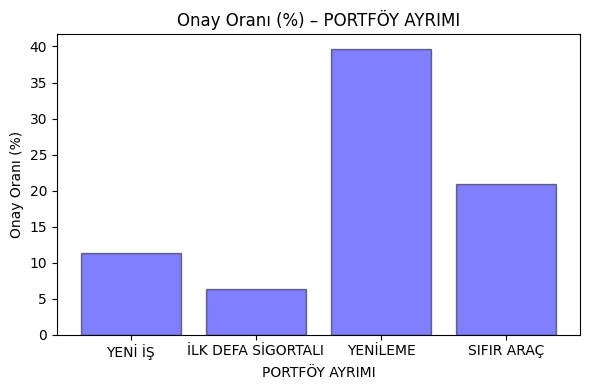

In [150]:
# Portföy ayrımı ile teklif onay durumu arasındaki ilişki
tab = df.groupby("PORTFÖY AYRIMI")["TEKLİF ONAY DURUMU"].agg(Adet="count", Onay_Oranı="mean").reset_index()
tab["Onay_Oranı_%"] = (tab["Onay_Oranı"] * 100).round(2)
tab = tab.sort_values("Adet", ascending=False).drop(columns="Onay_Oranı")

print(tab.to_string(index=False))

plt.figure(figsize=(6,4))
plt.bar(tab["PORTFÖY AYRIMI"], tab["Onay_Oranı_%"],
       color="blue", edgecolor="black", alpha=0.5)
plt.title("Onay Oranı (%) – PORTFÖY AYRIMI")
plt.xlabel("PORTFÖY AYRIMI"); plt.ylabel("Onay Oranı (%)")
plt.xticks(rotation=0); plt.tight_layout()
plt.show()

Sigortasını yenileyen ve sıfır araç sahibi olan bireylerin teklif onaylama oranı yüksek gözükmekte

SİGORTALI TİPİ  Adet  Onay_Oranı  Onay_Oranı_%
             O 13830    0.097614          9.76
             T  5255    0.194862         19.49


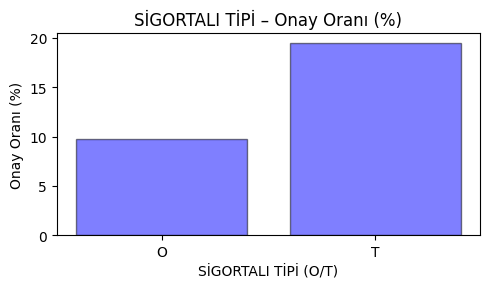

In [151]:
# Sigortalı tipi ve teklif onay durumu arasındaki ilişki
grp = df.groupby("SİGORTALI TİPİ")["TEKLİF ONAY DURUMU"]
tab = pd.DataFrame({"Adet": grp.size(), "Onay_Oranı": grp.mean()}).reset_index()
tab["Onay_Oranı_%"] = (tab["Onay_Oranı"] * 100).round(2)

print(tab.to_string(index=False))

plt.figure(figsize=(5, 3))
plt.bar(tab["SİGORTALI TİPİ"], tab["Onay_Oranı_%"],
       color="blue", edgecolor="black", alpha=0.5)
plt.title("SİGORTALI TİPİ – Onay Oranı (%)")
plt.xlabel("SİGORTALI TİPİ (O/T)")
plt.ylabel("Onay Oranı (%)")
plt.tight_layout()
plt.show()

 TRAFİK BASAMAK KODU  Adet  Onay_Oranı  Onay_Oranı_%
                   1    28    0.142857         14.29
                   2    67    0.059701          5.97
                   3   332    0.108434         10.84
                   4  3729    0.086082          8.61
                   5  4261    0.133537         13.35
                   6  2551    0.142297         14.23
                   7  5992    0.133344         13.33
                   8  2125    0.130824         13.08


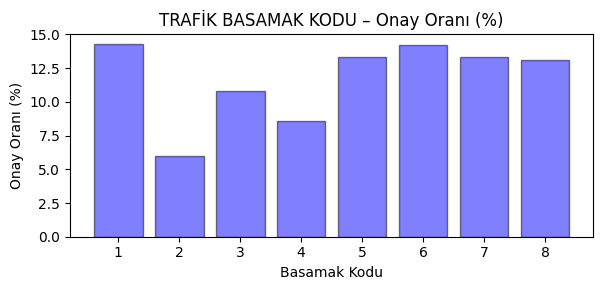

In [152]:
# Trafik basamak kodu ile teklif onay durumu arasındaki ilişki
grp = df.groupby("TRAFİK BASAMAK KODU")["TEKLİF ONAY DURUMU"]
tab = pd.DataFrame({"Adet": grp.size(), "Onay_Oranı": grp.mean()}).reset_index()
tab["Onay_Oranı_%"] = (tab["Onay_Oranı"] * 100).round(2)
tab = tab.sort_values("TRAFİK BASAMAK KODU").reset_index(drop=True)

print(tab.to_string(index=False))

plt.figure(figsize=(6, 3))
plt.bar(tab["TRAFİK BASAMAK KODU"].astype(str), tab["Onay_Oranı_%"],
       color="blue", edgecolor="black", alpha=0.5)
plt.title("TRAFİK BASAMAK KODU – Onay Oranı (%)")
plt.xlabel("Basamak Kodu"); plt.ylabel("Onay Oranı (%)")
plt.tight_layout(); plt.show()

In [153]:
df[df["TRAFİK BASAMAK KODU"].astype(float) < 4]


,TEKLİF NUMARASI,HASARSIZLIK İNDİRİMİ KADEMESİ,TRAFİK BASAMAK KODU,MARKA,ARAÇ YAŞI,MODEL YILI,YAKIT TİPİ,İL,İLÇE,YAŞ,TEKLİF PRİMİ,PORTFÖY AYRIMI,SİGORTALI TİPİ,TEKLİF ONAY DURUMU
23,15258,30%,1,VOLKSWAGEN,1,2023,BENZİN,ANKARA,ÇANKAYA,47,11.271,YENİLEME,O,0
81,15317,0%,3,VOLKSWAGEN,1,2023,BENZİN,İSTANBUL,BAKIRKÖY,32,10.861,YENİ İŞ,O,0
136,15374,60%,2,FORD,1,2023,DIZEL,İZMİR,KARABAĞLAR,59,17.619,YENİLEME,O,0
139,15377,0%,2,FORD,2,2022,DIZEL,İSTANBUL,BAHÇELİEVLER,48,6.624,İLK DEFA SİGORTALI,O,0
166,15404,40%,3,FORD,2,2022,DIZEL,İSTANBUL,EKSİK,0,13.727,YENİ İŞ,T,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18858,34342,0%,3,VOLKSWAGEN,4,2020,BENZİN,İSTANBUL,SARIYER,38,19.525,YENİ İŞ,O,0
18892,34376,0%,2,VOLKSWAGEN,1,2023,BENZİN,İSTANBUL,GAZİOSMANPAŞA,26,9.969,YENİ İŞ,O,0
18973,34459,60%,3,TOYOTA,1,2023,DIZEL,ANKARA,EKSİK,0,17.776,YENİ İŞ,T,0
19040,34526,0%,3,VOLKSWAGEN,4,2020,DIZEL,İSTANBUL,BÜYÜKÇEKMECE,29,14.960,İLK DEFA SİGORTALI,O,0


Case de Trafik basamak kodu 4 ile başlar durumunu ilk kez sigortalı olanların başlangıcı olarak yorumladım. Trafik basamak kodu 1, 2, 3 olanlar ise geçmiş risk durumu olarak yorumladım.
Bu yüzden ilk defa sigortalı durumunda trafik basamak kodu 1, 2, 3 olan var mı bakalım

In [154]:
df["TRAFİK BASAMAK KODU"] = pd.to_numeric(df["TRAFİK BASAMAK KODU"], errors="coerce")

mask = df["PORTFÖY AYRIMI"].isin(["İLK DEFA SİGORTALI"]) & (df["TRAFİK BASAMAK KODU"] < 4)
sub = df.loc[mask, ["PORTFÖY AYRIMI","TRAFİK BASAMAK KODU"]]

tab = (sub.groupby(["PORTFÖY AYRIMI","TRAFİK BASAMAK KODU"])
          .size().reset_index(name="Adet").sort_values(["PORTFÖY AYRIMI","TRAFİK BASAMAK KODU"]))
print(tab.to_string(index=False))


    PORTFÖY AYRIMI  TRAFİK BASAMAK KODU  Adet
İLK DEFA SİGORTALI                    1     9
İLK DEFA SİGORTALI                    2    18
İLK DEFA SİGORTALI                    3    84


In [155]:
df.loc[mask, "TRAFİK BASAMAK KODU"] = 4
df["TRAFİK BASAMAK KODU"] = pd.to_numeric(df["TRAFİK BASAMAK KODU"], errors="coerce")

mask = df["PORTFÖY AYRIMI"].isin(["İLK DEFA SİGORTALI"]) & (df["TRAFİK BASAMAK KODU"] < 4)
sub = df.loc[mask, ["PORTFÖY AYRIMI","TRAFİK BASAMAK KODU"]]

tab = (sub.groupby(["PORTFÖY AYRIMI","TRAFİK BASAMAK KODU"])
          .size().reset_index(name="Adet").sort_values(["PORTFÖY AYRIMI","TRAFİK BASAMAK KODU"]))
print(tab.to_string(index=False))

Empty DataFrame
Columns: [PORTFÖY AYRIMI, TRAFİK BASAMAK KODU, Adet]
Index: []


- yeni işe girenler kurumsal mı bireysel mi ?
- trafik basamak kodunu detaylı incele ?